In [1]:
import pandas as pd
import numpy as np

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
df = pd.read_csv('../simulation_output/run2/sim3.csv')

In [13]:
df.head()

,delta,p,corr_p,t,p_t (two),p_t (one)
0,0,0.43089,0.43089,-0.174391,0.861919,0.430960
1,1,0.13045,0.13045,1.127516,0.262282,0.131141
2,2,0.14465,0.14465,1.055041,0.294056,0.147028
3,3,0.00398,0.00398,-2.701671,0.008149,0.004075
4,4,0.33967,0.33967,0.416871,0.677688,0.338844


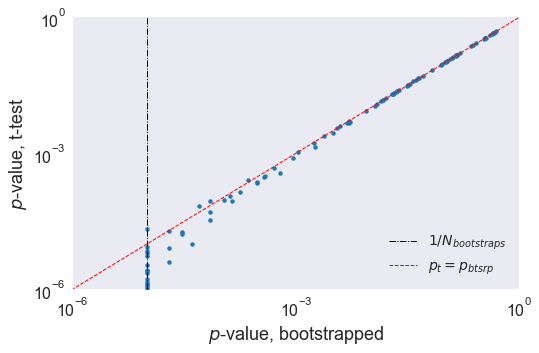

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(data=df, x='corr_p', y='p_t (one)', scatter_kws={'s': 20, 'alpha':1},
            line_kws={'ls':'--', 'lw':1, 'color':'red', 'label': 'best fit line'}, ax=ax, fit_reg=False)
plt.axvline(10**-5, ls='-.', color='k', lw=1, label=r'$1/N_{bootstraps}$')
plt.plot(np.linspace(10**-7, 10), np.linspace(10**-7, 10), '--', lw=1, color='red', label=r'$p_t = p_{btsrp}$')

plt.xlim(10**-6, 1)
plt.ylim(10**-6, 1)

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.000001, 0.001, 1])
plt.yticks([0.000001, 0.001, 1])

plt.xlabel(r'$p$-value, bootstrapped')
plt.ylabel(r'$p$-value, t-test')

plt.savefig('../simulation_output/plots/run2_sim3.svg', bbox_inches='tight')

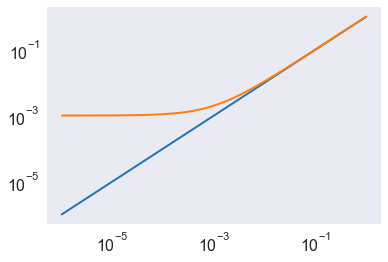

In [5]:
x = np.logspace(-6, 0, 100)

plt.plot(x, x)
plt.plot(x, x + 10**-3)

plt.xscale('log')
plt.yscale('log')

In [6]:
def likelihood(s, x, y, robust=False):
    if robust:
        return ((y - s*x)**2).sum()
    else:
        return np.abs(y - s*x).sum()

In [7]:
S = np.linspace(0, 2, 1000)

lk_lsq = np.zeros(len(S))
lk_rbt = np.zeros(len(S))
for i, s in enumerate(S):
    lk_lsq[i] = likelihood(s, df.corr_p, df['p_t (one)'])
    lk_rbt[i] = likelihood(s, df.corr_p, df['p_t (one)'], robust=True)

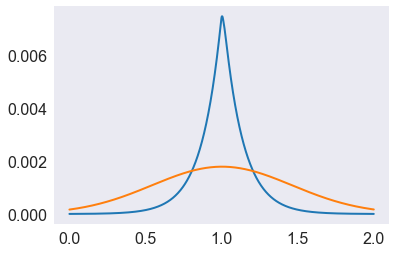

In [8]:
plt.plot(S, np.exp(-lk_lsq)/np.exp(-lk_lsq).sum())
plt.plot(S, np.exp(-lk_rbt)/np.exp(-lk_rbt).sum())

In [9]:
S[np.where(lk_lsq == np.min(lk_lsq))]

array([ 1.003003])

In [10]:
S[np.where(lk_rbt == np.min(lk_rbt))]

array([ 1.003003])